In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import umap
import trimap
import pacmap
from sklearn.manifold import Isomap
from sklearn.manifold import SpectralEmbedding
from sklearn.manifold import LocallyLinearEmbedding

/Users/carl/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Number of samples:  1797
Dimension of each sample: (64,)
(1797, 64)


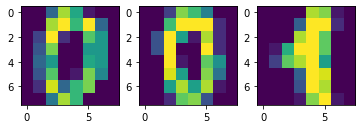

In [4]:
digits = datasets.load_digits()
print("Number of samples: ", len(digits.data))
print("Dimension of each sample:", digits.data[0].shape)
print(digits.data.shape)

plt.subplot(1,3,1);plt.imshow(digits.data[0].reshape(8,8))
plt.subplot(1,3,2);plt.imshow(digits.data[20].reshape(8,8))
plt.subplot(1,3,3);plt.imshow(digits.data[11].reshape(8,8))

In [133]:
def algoSpecEmb(dataset, ndim=2):

    embedding = SpectralEmbedding(n_components = ndim).fit_transform(dataset)
                                  
    return embedding
                                

In [104]:
def algoTSNE(dataset, ndim = 2):
    # 
    from sklearn.manifold import TSNE
  
    embedding = TSNE(n_components=ndim, learning_rate='auto',
                 init='random').fit_transform(dataset)
    return embedding

In [105]:
def algoPCA(dataset, ndim=2):
    from sklearn.decomposition import PCA
    embedding = PCA(n_components=ndim).fit_transform(dataset)
    return embedding

In [106]:
def algoUMAP(dataset,ndim=2):

    embedding = umap.UMAP(n_components=ndim).fit_transform(dataset)
    
    return embedding

In [5]:
def algoTRIMAP(dataset, distance, ndim=2):
    
    embedding = trimap.TRIMAP(n_dims=ndim, distance=distance).fit_transform(dataset)
    
    return embedding


In [159]:
def algoLocLinEmb(dataset, ndim=2):
    params = {
        "n_neighbors": 12,
        "n_components": ndim,
        "eigen_solver": "auto",
        "random_state": nr.RandomState(0),
    }

    embedding = LocallyLinearEmbedding(method="standard", **params).fit_transform(dataset)
    
    return embedding


In [5]:
def plotscatter(reduced, classtargets):
    plt.scatter(reduced[:,0], reduced[:,1], c=classtargets, cmap='Spectral', s=5)
    
def plotdigit(sample):
    sns.heatmap(sample.reshape(8,8), annot=True)

In [74]:
def algoPaCMAP(dataset, ndim=2):
    pmap = pacmap.PaCMAP(n_components=ndim+1, n_neighbors=None, MN_ratio=0.5, FP_ratio=2.0) 

    # fit the data (The index of transformed data corresponds to the index of the original data)
    embedding = pmap.fit_transform(dataset, init="pca")
    
    return embedding[:,1:]


In [96]:
def algoIsomap(dataset, ndim=2):

    from sklearn.manifold import Isomap

    embedding = Isomap(n_components=2).fit_transform(dataset)
    
    return embedding

In [158]:
import numpy.random as nr
nr.RandomState(0)

RandomState(MT19937) at 0x177CC7140

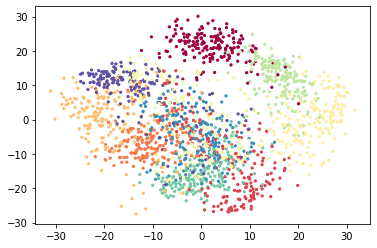

In [8]:
reduced = algoPCA(digits.data)
plotscatter(reduced, digits.target)

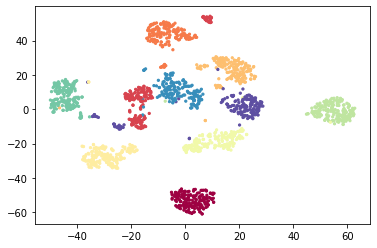

In [9]:
reduced = algoTSNE(digits.data)
plotscatter(reduced, digits.target)

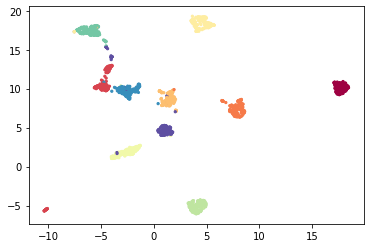

In [10]:
reduced = algoUMAP(digits.data)
plotscatter(reduced, digits.target)

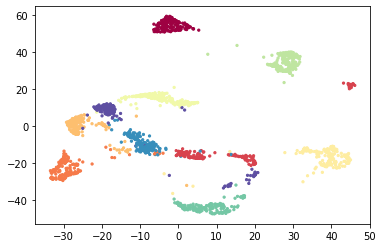

In [11]:
reduced = algoTRIMAP(digits.data, distance="manhattan")
plotscatter(reduced, digits.target)

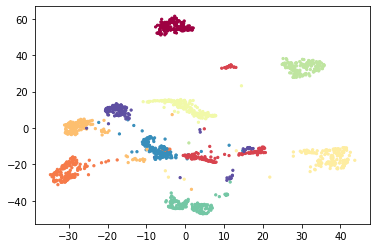

In [12]:
reduced = algoTRIMAP(digits.data, distance="euclidean")
plotscatter(reduced, digits.target)

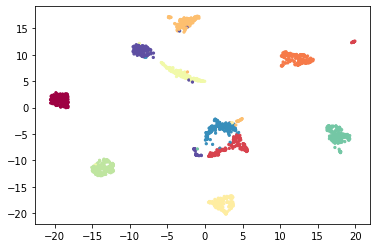

In [75]:
reduced = algoPaCMAP(digits.data)
plotscatter(reduced, digits.target)

/Users/carl/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_isomap.py:348: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/carl/miniconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


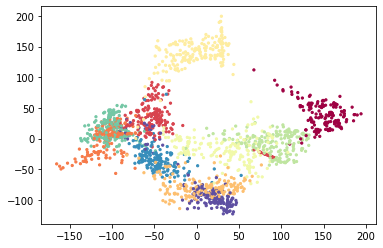

In [152]:
reduced = algoIsomap(digits.data)
plotscatter(reduced, digits.target)

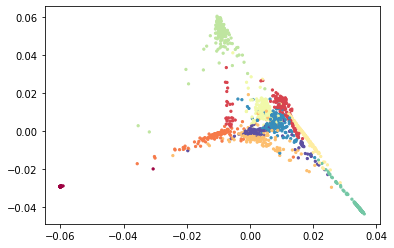

In [160]:
reduced = algoLocLinEmb(digits.data)
plotscatter(reduced, digits.target)

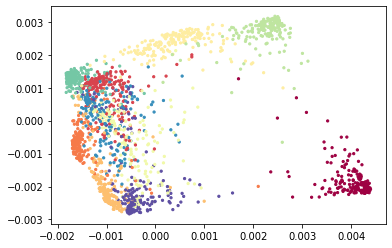

In [139]:
reduced = algoSpecEmb(digits.data)
plotscatter(reduced, digits.target)

In [ ]:
##done algorithms
# pacmap
# trimap
# tsne
# pca
# quality diversity 
# umap
##Locally Linear Embeddings
## Spectural Embedding